In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 8. Optimization for Traning Deep Models

## 8.1. How Learning Differs from Pure Optimization

In most machine learning scenarios, we care about some performance measure P, that is deﬁned with respect to the **test set** and may also be intractable.
We therefore **optimize P only indirectly**. We reduce a diﬀerent cost function J(θ) in the hope that doing so will improve P. 

<center> $J(\theta) = \mathbb{E}_{(x,y)\sim\hat{p}_{data}}L(f(x;\theta),y) $

### 8.1.1. Empirical Risk Minimization

The goal of a machine learning algorithm is to reduce the expected generalization error given by equation. This quantity is known as the **risk**

However, when **we do not know $p_{data}(x,y)$ ** but only have a training set of samples, we have a machine learning problem

The simplest way to convert a machine learning problem back into an optimization problem is **to minimize the expected loss on the training set.**

<center>$ \cfrac{1}{m}\sum^m_{i=1}L(f(x^{(i)};\theta), y^{(i)})$

m is the number of training examples

- However, **empirical risk minimization is prone to overﬁtting**

- The most eﬀective modern optimization algorithms are based on gradient descent, but many useful loss functions, such as 0-1 loss, **have no useful derivatives** (the derivative is either zero or undeﬁned everywhere).

### 8.1.2. Surrogate Loss Functions and Early Stopping

a surrogate loss function instead, which **acts as a proxy but has advantages. **

For example, **the negative log-likelihood** of the correct class is typically used as a surrogate for the 0-1 loss.

### 8.1.3. Batch and Minibatch Algorithms

In practice, we can compute these expectations by **randomly sampling a small number of examples from the dataset**, then taking the average over only those examples

- **converge much faster** (in terms of total computation, not in terms of number of updates) if they are allowed to rapidly **compute approximate estimates of the gradient rather than slowly computing the exact gradient**

- Another consideration motivating statistical estimation of the gradient from a small number of samples is **redundancy in the training set**


- use the entire training set : **batch or deterministic** gradient methods
- use only a single example at a time :  **stochastic** or sometimes **online** methods.
- **use more than one but less than all of the training examples : minibatch or minibatch stochastic** methods and it is now common to simply call them stochastic methods. 

Minibatch sizes are generally driven by the following factors:
- Larger batches provide a more accurate estimate of the gradient, but with less than linear returns. 
- Multicore architectures
- to be processed in parallel, then the amount of memory scales with the batch size
- **Small batches can oﬀer a regularizing eﬀect**
    - Generalization error is often best for a batch size of 1.
    - Training with such **a small batch size **might **require a small learning rate** to maintain stability due to the high variance in the estimate of the gradient.
  

-  Methods that compute updates based **only on the gradient g** are usually relatively robust and can handle **smaller batch sizes like 100**
- **Second-order methods, which use also the Hessian matrix** H require much larger batch sizes like **10,000**

## 8.2 Challenges in Neural Network Optimization
When training neural networks, we must confront the general non-convex case.

* 수치해석 분야에서 함수의 조건수(condition number)는 argument에서 의 작은 변화의 비율에 대해 함수가 얼마나 변화할 수 있는지에 대한 argument measure이다. (https://ko.wikipedia.org/wiki/%EC%A1%B0%EA%B1%B4%EC%88%98)

### 8.2.1 Ill-Conditionin
- **The ill-conditioning problem is generally believed to be present in neural network training problems.**
- Ill-conditioning can manifest by causing SGD to get “stuck” in the sense that even very small steps increase the cost function

a second-order Taylor series expansion 
<center>$ \cfrac{1}{2}\epsilon^2g^THg - \epsilon g^Tg$

Ill-conditioning of the gradient becomes a problem  **when $ \cfrac{1}{2}\epsilon^2g^THg$ exceeds $\epsilon g^Tg$.** 

- In many cases, the gradient norm : $g^Tg$ does not shrink signiﬁcantly throughout learning, 

- but the $g^THg$ term grows by more than an order of magnitude

The result is that **learning becomes very slow despite the presence of a strong gradient because the learning rate must be shrunk to compensate for even stronger curvature **

### 8.2.2 Local Minima
- Neural networks and any models with multiple equivalently parametrized latent variables all have multiple local minima because of the model **identiﬁability problem**

- Models with latent variables are often **not** identiﬁable **because we can obtain equivalent models by exchanging latent variables with each other** (weight space symmetry)

- This means that **there can be an extremely large or even uncountably inﬁnite amount of local minima **

- Nowdays The problem is ** to ﬁnd a point in parameter space that has low but not minimal cost**

### 8.2.3 Plateaus, Saddle Points and Other Flat Regions

### 8.2.4 Cliﬀs and Exploding Gradients

### 8.2.5 Long-Term Dependencies
when the computational graph becomes extremely deep

suppose that a computational graph contains a path that consists of repeatedly multiplying by a matrix $W$.

**After t steps**, this is equivalent to multiplying by $W^t$.

Suppose that W has an eigendecomposition $W = V\text{diag}(λ)V^{−1}$. 

<center> $W^t = (V\text{diag}(λ)V^{−1})^t = V\text{diag}(λ)^tV^{−1}$

** vaninshing and exploding gradient problem**

### 8.2.6 Inexact Gradients


### 8.2.7 Poor Correspondence between Local and Global Structure

### 8.2.8 Theoretical Limits of Optimization

## 8.3 Basic Algorithms

### 8.3.1 Stochastic Gradient Descent
- compute gradient estimate : $ \hat{g} \leftarrow +\frac{1}{m}\nabla_\theta \sum_i {L(f(x^{(i)};\theta), y^{(i)})} $

- applay udate : $ \theta \leftarrow \theta - \epsilon \hat{g} $

- A sufficient condition to guarantee convergence of SGD is that

<center>$ \sum^\infty_{k=1} \epsilon_k = \infty$

<center>$ \sum^\infty_{k=1} \epsilon^2_k < \infty$

deacy the learning rate

$ \epsilon_k = (1-a)\epsilon_0 + a\epsilon_\tau$

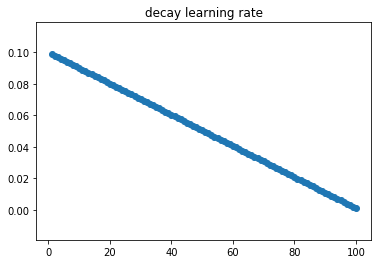

In [14]:
tau = 100
k = np.arange(1,tau+1)
a = k / tau

e_0 = 0.1
e_tau = e_0 * 0.01

e_k = (1-a)*e_0  + a*e_tau

plt.title ("decay learning rate")
plt.scatter(k, e_k)

### 8.3.2 Momentum
$ v \leftarrow av - \epsilon \nabla_\theta \left( \cfrac{1}{m}\sum_i {L(f(x^{(i)};\theta), y^{(i)})}\right)$

$ \theta \leftarrow \theta + v $ 

- momentum hyperparmete in therms of $ \cfrac{1}{1-a}$,  a = 0.9 일때 10배 빨라진다는 의미
- 마찰력(friction)이나 turbulent drag 보다는 점성 저항(viscous drag)이 적당


### 8.3.3 Nesterov Momentum
$ v \leftarrow av - \epsilon\nabla_\theta \left[\cfrac{1}{m}\sum_i {L(f(x^{(i)};\theta+av), y^{(i)})} \right]$

$ \theta \leftarrow \theta + v $ 

- Nesterov momentum the gradient is evaluated after the current velocity is applied. 

## 8.4 Parameter Initialization Strategies

## 8.5 Algorithms with Adaptive Learning Rates

### 8.5.1 AdaGrad

- adapts the learning rates of all model parameters by scaling them inversely proportional to the square root of the sum of all of their historical squared value
- compute gradient estimate : $ g \leftarrow \frac{1}{m}\nabla_\theta \sum_i {L(f(x^{(i)};\theta), y^{(i)})} $

- accumulate squared gradient : $ r \leftarrow r + g \odot g$

- compute update $ \triangle\theta \leftarrow -\cfrac{\epsilon}{\delta + \sqrt{r}} \odot g$

- apply update $ \theta \leftarrow \theta + \triangle\theta $

### 8.5.2 RMSProp
- compute gradient estimate : $ g \leftarrow \frac{1}{m}\nabla_\theta \sum_i {L(f(x^{(i)};\theta), y^{(i)})} $

- accumulate squared gradient : $ r \leftarrow \rho r + (1-\rho)g \odot g$

- compute update $ \triangle\theta \leftarrow -\cfrac{\epsilon}{\sqrt{\delta+r}} \odot g$

- apply update $ \theta \leftarrow \theta + \triangle\theta $

### 8.5.3 Adam
- Initialize 1st and 2nd moment variables , s = 0 r = 0 
- compute gradient estimate : $ g \leftarrow \frac{1}{m}\nabla_\theta \sum_i {L(f(x^{(i)};\theta), y^{(i)})} $

- update biased first moment estimate : $ s \leftarrow \rho_1s + (1-\rho_1)g $ 

- update biased second moment estimate : $ r \leftarrow \rho_2r + (1-\rho_2)g\odot g $ 

- correct bias in first moment : $ \hat{s} \leftarrow \cfrac{s}{1-\rho_1^t} $

- correct bias in second moment : $ \hat{r} \leftarrow \cfrac{r}{1-\rho_2^t} $

- compute update $ \triangle\theta = -\epsilon\cfrac{\hat{s}}{\sqrt{\hat{r}}+\delta} $

- apply update $ \theta \leftarrow \theta + \triangle\theta $

### 8.5.4 Choosing the Right Optimization Algorithm

## 8.6 Approximate Second-Order Methods


### 8.6.1 Newton’s Method

### 8.6.2 Conjugate Gradients

### 8.6.3 BFGS


## 8.7 Optimization Strategies and Meta-Algorithm

### 8.7.1 Batch Normalization


### 8.7.2 Coordinate Descent


### 8.7.3 Polyak Averaging

### 8.7.4 Supervised Pretraining


### 8.7.5 Designing Models to Aid Optimization


### 8.7.6 Continuation Methods and Curriculum Learning


add the weigth decay and solve for the minimum of the regluarized version of $ \hat{J} $

$\tilde{w}$to represent the location of the minimum

<center>$ \alpha\tilde{w} + H(w-w^*) = 0 $

<center>$ \tilde{w} = (H+\alpha I)^{-1}Hw^* $

As α approaches 0, the regularized solution $\tilde{w}$ approaches $w^*$


<center>$ H = Q \Lambda Q^T $

<center>$\tilde{w} = Q(\Lambda + \alpha I)^{-1}\Lambda Q^Tw^* $

Speciﬁcally, the component of w∗ that is aligned with the i-th eigenvector of H is rescaled by a factor of $\cfrac{\lambda_i}{\lambda_i+\alpha}$

**Along the directions where the eigenvalues of H are relatively large, for example, where λi $\gg$α, the eﬀect of regularization is relatively small. However, components with λi $\ll$α will be shrunk to have nearly zero magnitude**

The corresponding eigenvalue is large, indicating high curvature. As a result, weight decay aﬀects the position of w2 relatively little.


### 7.1.2. $L^1$ Regularization

<center>$\Omega(\theta)=||w||_1=\sum_i{|w_i|} $

<center>$ \tilde{J}(w; X, y) = \alpha||w||_1 + J(w; X, y) $

<center>$ \nabla_w \tilde{J}(w; X, y) = \alpha $sign$(w) + \nabla_wJ(X, y;w)  $

<center>$ \nabla_w \hat{J}(w) = H(w-w^*) $

make the further simplifying assumption that the Hessian is diagonal
This assumption holds if the data for the linear regression problem has been preprocessed to **remove all correlation between the input features**, which may be accomplished using PCA

<center>$ \tilde J(w;X,y) = J(w^*;X,y) + \sum_i[\cfrac{1}{2}H_{i,i}(w_i-w_i^*)^2 + \alpha|w_i|]$

<center>$ w_i = $sign$(w_i^*) \ $max$ \left\{ |w_i^*| - \cfrac{\alpha}{H_{i,i}},0\right\}$

In comparison to L2 regularization, L1 regularization results in a solution that is more **sparse**

The sparsity property induced by L1 regularization has been used extensively as a **feature selection** mechanism

## 7.2. Norm Penalties as Constrained Optimization
If we wanted to constrain Ω(θ) to be less than some constant , we could construct a ** generalized Lagrange function **

<center>$ \mathcal{L}(\theta, \alpha; X, y) = J(\theta;,X,y) + \alpha(\Omega(\theta)-k) $

The Solution

<center>$ \theta^* = \underset{\theta}{\text{arg min}} \ \underset{\alpha, \alpha\ge0}{\text{max}} \mathcal{L}(\theta, \alpha)$

solving this problem requires modifying both $\theta$ and $\alpha$ <br>
- $\alpha$ must increase whenever  $\Omega(\theta) > k$ <br>
- $\alpha$ must decrease whenever $\Omega(\theta) < k$ <br>
- All positive $\alpha$ encourage $\Omega(\theta)$ to shrink
- Optimal value $\alpha^*$ will encourage $\Omega(\theta)$ to shrink, but not so strongly to make $\Omega(\theta) < k$

#### $k$를 모르므로 $\alpha$를 사용해서  contrained region 의 크기(size)를 조절한다?

To gain some insight into the eﬀect of the constraint, we can ﬁx α∗ and view the problem as just a function of $\theta$


<center>$ \theta^* = \underset{\theta}{\text{arg min}} \ \mathcal{L}(\theta, \alpha^*) 
= \underset{\theta}{\text{arg min}} \ J(\theta; X, y) + \alpha^*\Omega(\theta)$

**This is exactly the same as the regularized training problem of minimizing $\tilde{J}$**

We can thus think of a parameter norm penalty as imposing a constraint on the weights

#### explicit contraints 라는 것은 k값을 알고 있다는 의미?

Can also use <strong><em> explicit constraints </em></strong> rather than penalties

- can modify SGD to take a step downhill on $J(\theta)$ and then project $\theta$ back to the nearest point that satisfies $\Omega(\theta) < k $.
- useful if we know what value of $k$ is appropriate and don't want to waste time searching for $\alpha$ that corresponds to this $k$
- penalties can cause non-convex optimization procedures to get stuck in local minima corresponding to small $\theta$
- Explicit constraints implemented by re-projection only have an effect when the weights become large and attempt to leave the constraint region
- Explicit constraints with reprojection imposes some <strong> stability </strong> on the optimization procedure - prevents positive feedback loop from continuing to increase the magnitude of the weights without bound.
- In practice, column norm limitation is always implemented as an explicit constraint with reprojection so as to prevent any one hidden unit from having very large weights. 
- If we converted this constraint into a penalty in a Lagrange function, it would be similar to $L^2$ weight decay but with a separate KKT multiplier for the weights of each hidden unit

## 7.3. Regularization and Under-Constrained Problems
In this case, many forms of regularization correspond to inverting $X^TX + \alpha I$ instead

**An iterative optimization procedure like stochastic gradient descent will continually increase the magnitude of w and, in theory, will never halt.**

**Most forms of regularization are able to guarantee the convergence of iterative methods applied to underdetermined problems.** For example, weight decay will cause gradient descent to quit increasing the magnitude of the weights when the slope of the likelihood is equal to the weight decay coeﬃcient. 

## 7.4. Dataset Augmentation
## 7.5. Noise Rubustness
-  In the general case, it is important to remember that noise injection can be much more powerful than simply shrinking the parameters, especially when **the noise is added to the hidden units.**
- Another way that noise has been used in the service of regularizing models is by **adding it to the weights. **
- random perturbation $ \epsilon W \sim N(\epsilon; 0, \eta I)$. The objective function :
<center>$ \tilde{J}_W = \mathbb{E}_{p(x,y,\epsilon W}[(\hat{y}_{\epsilon W}(x) - y)^2]$
$ = \mathbb{E}_{p(x,y,\epsilon W}[\hat{y}^2_{\epsilon W}(x) -2y\hat{y}_{\epsilon W}(x)+ y^2]$
- For small η, the minimization of J with added weight noise (with covariance ηI) is equivalent **to minimization of J with an additional regularization term: **


### 7.5.1. Injecting Noise at the Output Targets
Most datasets have some amount of mistakes in the y labels. It can be harmful to maximize logp(y | x) when y is a mistake. One way to prevent this is to explicitly **model the noise on the labels. **
label smoothing

## 7.6. Semi-Supervised Learning

In the context of deep learning, semi-supervised learning usually refers to learning a representation h = f(x). 

The goal is to learn a representation so that **examples from the same class have similar representations**

- generatvie model : P(x), P(x,y) / unsupervised or generatvie criterion : -logP(x) or -logP(x,y)
- discriminative model : P(y|x) / supervised criterion : -log P(y|x)

## 7.7. Multi-Task Learining
1. Task-speciﬁc parameters (which only beneﬁt from the examples of their task to achieve good generalization)
2. Generic parameters, shared across all the tasks (which beneﬁt from the pooled data of all the tasks)

 the underlying prior belief is the following: among the factors that explain the variations observed in the data associated with the diﬀerent tasks, some are shared across two or more tasks


## 7.8. Early Stopping

Every time the error on the validation set improves, we store a copy of the model parameters. When the training algorithm terminates, we return these parameters, rather than the latest parameters. The algorithm terminates when no parameters have improved over the best recorded validation error for some pre-speciﬁed number of iterations

- One way to think of early stopping is as a **very eﬃcient hyperparameter selection algorithm. **

- it is easy to use early stopping **without damaging the learning dynamics.**

**How early stopping acts as a regularizer:**

-  (1995) early stopping has the eﬀect of restricting the optimization procedure to a relatively small volume of parameter space in the neighborhood of the initial parameter value 


- $\tau$ optimization steps (corresponding to $\tau$ training iterations) 
- learning rate $\epsilon$
- **We can view the product $\epsilon\tau$ as a measure of eﬀective capacity**


- ** early stopping is equivalent to L2 regularization. **
- $ (I-\epsilon \Lambda)^\tau = (\Lambda + \alpha I)^{-1}\alpha$
- $\alpha \approx \cfrac{1}{\tau\epsilon}$
-  **the inverse of $\tau\epsilon$ plays the role of the weight decay coeﬃcient. **


-  early stopping automatically determines the correct amount of regularization 

## 7.9. Parameter Tying and Parameter Sharing

- a parameter norm penalty is one way to regularize parameters to be close to one anothe

- <center>$\Omega(w^{(A)}, w^{(B)}) = ||w^{(A)} -  w^{(B)}||^2_2$

- the more popular way is to use constraints: **to force sets of parameters to be equal. ==> parameter sharing **




## 7.10. Sparse Representation

## 7.11. Bagging and Other Ensemble Method

## 7.12. Dropout

- To a ﬁrst approximation, dropout can be thought of as ** a method of making bagging practical for ensembles** of very many large neural networks
- we can eﬀectively remove a unit from a network by ** multiplying its output value by zero**
-  Speciﬁcally, to train with dropout, we use a minibatch-based learning algorithm that makes small steps, such as stochastic gradient descent
- Each time we load an example into a minibatch, we randomly sample a ** diﬀerent binary mask to apply to all of the input and hidden units in the network**
- In the case of bagging, the models are all independent. 
- In the case of **dropout, the models share parameters.** This parameter sharing makes it possible to represent an exponential number of models with a tractable amount of memor
- In the case of bagging,each model i produces a probability distribution $ p^{(i)} (y | x)$. The prediction of the ensemble is given by the arithmetic mean of all of these distributions. $ \cfrac{1}{k}\sum_{i=1}^k p^{(i)}(y|x) $
- In the case of dropout, each sub-model deﬁned by mask vector µ deﬁnes a probability distribution $ p(y | x,µ). $ The arithmetic mean over all masks is given by $ \sum_\mu p(\mu)p(y|x,\mu) $ where p(µ) is the probability distribution that was used to sample µ at training time. 
- To make predictions we must re-normalizae the ensemble:
$ P_{ensamble}(y|x) = \cfrac{\tilde{P}_{ensemble}(y|x)}{\sum_{y'}\tilde{P}_{ensemble}(y'|x)} $
- ** A key insight involved in dropout is that we can approximate ensemble by evaluating p(y | x) in one model **
- One advantage of dropout is that it is very computationally cheap
- Another signiﬁcant advantage of dropout is that it does not signiﬁcantly limit the type of model or training procedure that can be used.
- It is important to understand that a large portion of the power of dropout arises from the fact that **the masking noise is applied to the hidden units**

## 7.13. Adversarial Training


## 7.14. Tangent Distance, Tangent Prop, and Manifold Tangent Classiﬁer

- One of the early attempts to take advantage of the manifold hypothesis is the tangent distance algorithm 
-  It is a non-parametric nearest-neighbor algorithm in which the metric used is **not the generic Euclidean distance** but one that is derived from knowledge of the **manifolds near which probability concentrates.**


manifold tangent classiﬁer

- (1) use an autoencoder to learn the manifold structure by unsupervised learning, and
- (2) use these tangents to regularize a neural net classiﬁer as in tangent pro